<a href="https://colab.research.google.com/github/Shri-Aiswarya/NLP/blob/main/NLP_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1. Accuracy of classifier model with Keras

1. Import the 'one_hot', 'pad_sequences', 'Sequential', 'Dense, Flatten',
'Embedding', and 'pandas' libraries.

2. Define the corpus with the following sentences: This is good pizza, I
love Italian pizza, The best pizza, nice pizza, Excellent pizza, I love
pizza, The pizza was alright, disgusting pineapple pizza, not good
pizza, bad pizza, very bad pizza, I had better pizza.

3. Create class labels for each sentence '1' for positive and '0' for
negative.

4. Create a data frame with 'text' as corpus and 'sentiment' as labels.

5. Extract the vocabulary from the corpus and encode it.

6. Pad the document to the maximum length of the longest sentences to
have uniform length.

7. Define the model with Keras with Embedding (None, 5.8) as output
shape, Flatten (None, 40), and Dense (None, 1).

8. Use epochs = 50, optimizer ='adam', loss='binary_crossentropy', and
metrics=['acc'].

9. What are your conclusions about the model?

In [4]:
!pip install tensorflow

#Importing all the required libraries
import pandas as pd
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

#Defining the corpus
corpus = [
    "This is good pizza",
    "I love Italian pizza",
    "The best pizza",
    "nice pizza",
    "Excellent pizza",
    "I love pizza",
    "The pizza was alright",
    "disgusting pineapple pizza",
    "not good pizza",
    "bad pizza",
    "very bad pizza",
    "I had better pizza"
]

#Defining the labels 1 for positive, 0 for negative
labels = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1]

#Creating the DataFrame
data = pd.DataFrame({'text': corpus, 'sentiment': labels})

#Encoding the vocabulary extracting from the corpus
#Arbitrary size for the vocabulary
vocab_size = 50
encoded_docs = [one_hot(sentence, vocab_size) for sentence in data['text']]

#Padding the sequences with the max length
max_length = max(len(doc) for doc in encoded_docs)
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

#Defining the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=5, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

#Fitting the model
model.fit(padded_docs, data['sentiment'], epochs=50, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - acc: 0.6667 - loss: 0.6892
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - acc: 0.8333 - loss: 0.6873
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - acc: 0.8333 - loss: 0.6853
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - acc: 0.8333 - loss: 0.6833
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - acc: 0.8333 - loss: 0.6814
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 0.8333 - loss: 0.6794
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - acc: 0.8333 - loss: 0.6775
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - acc: 0.9167 - loss: 0.6755
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - acc: 1.0000 - loss: 0.6736
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - acc: 1.0000 - loss: 0.6716
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - acc: 1.0000 - loss: 0.6697
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - acc: 1.0000 - loss: 0.6678
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - acc

My Conclusions about the model are:

The model shows impressive performance during training, achieving 100% accuracy by the end of 50 epochs. This suggests effective learning but raises concerns about overfitting, especially given the small dataset of only 12 sentences. The consistent decrease in loss indicates that the model is improving its predictions, yet high training accuracy may not reflect true generalization. To better assess its performance, it's essential to evaluate the model on a separate test set. Gathering more data and implementing techniques like cross-validation and regularization would help improve the model’s robustness and generalization capabilities.

Exercise 2.

1. Load nltk, pandas, re, numpy, and matplotlb.

2. Use the Tweets.csv file in Google Drive

3. Take a look at the first five rows.

4. Plot the shares of airlines mentioned in the data.

5. Plot the percentage of positive, negative, and neutral sentiments.

6. In a bar chart, show the number of positive, negative, and neutral
comments by airline.

7. Using Seaborn, show airlines' sentiment confidence.

8. Define the features and labels.

9. Clean the tweets.

10. Vectorize the tweets.

11. Create a train and test (20%) dataset.

12. Import the RandomClassifier model.

13. Define the 'predictions'.

14. Generate the confusion matrix, the classification report, and the
accuracy score.

15. What is your conclusion?

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           neutral                        1.0000   
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

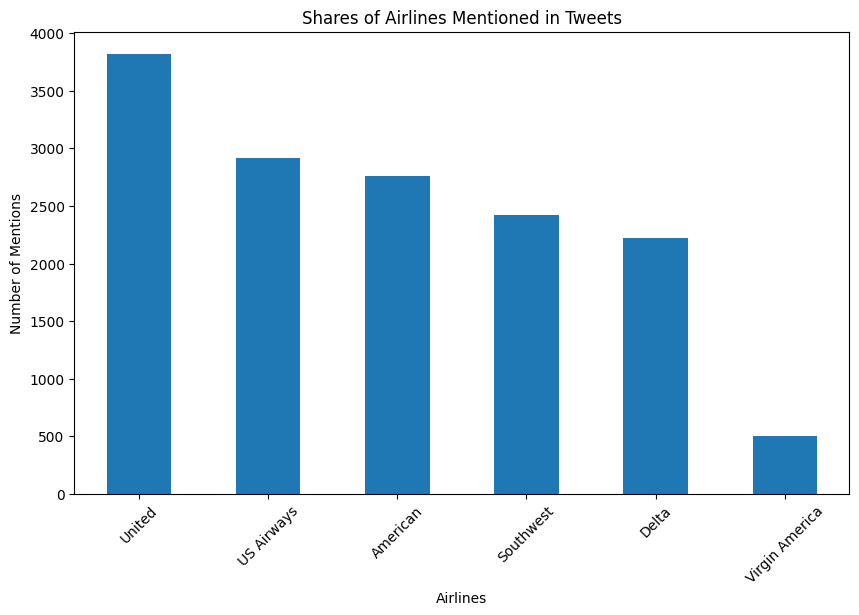

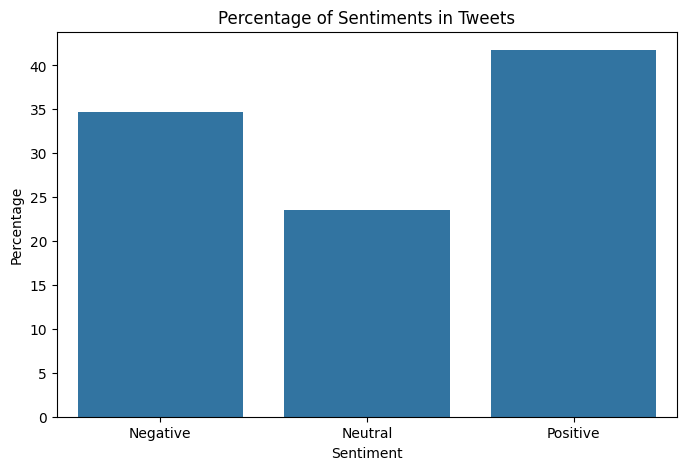

<ipython-input-3-85c906d53b2f>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  airline_sentiment_counts = tweets.groupby(['airline', 'sentiment']).size().unstack(fill_value=0)


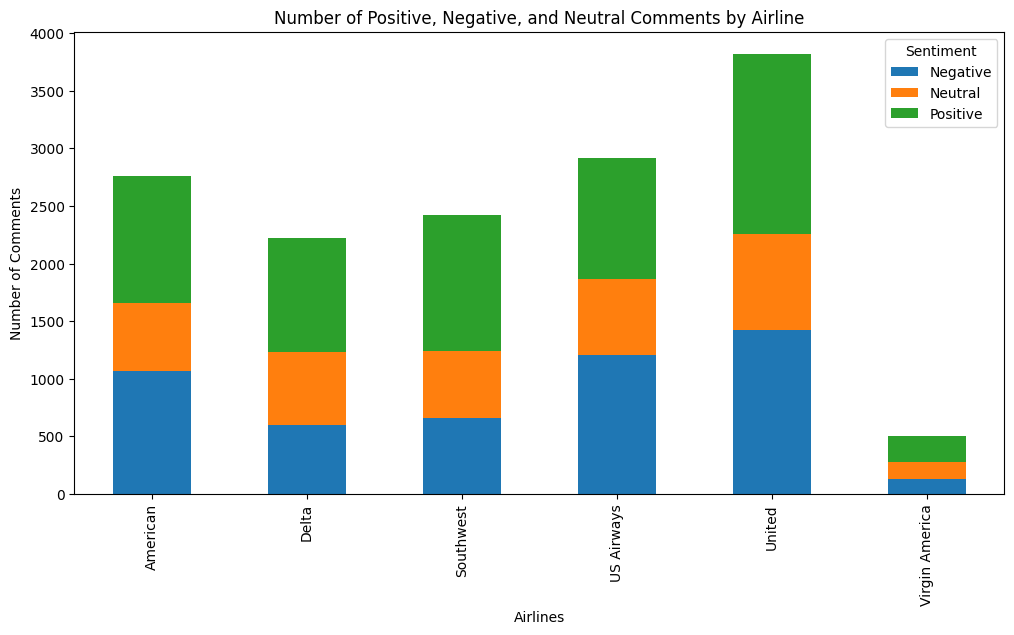

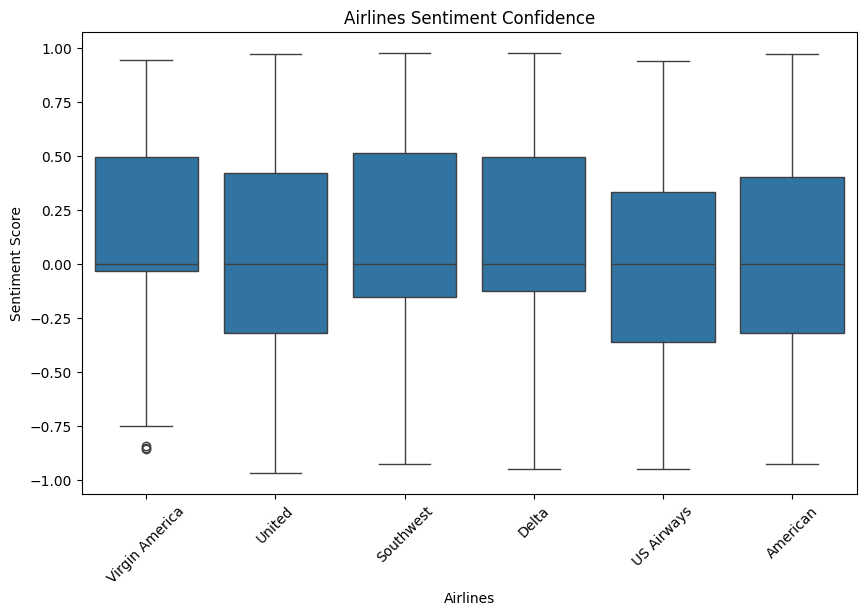

Confusion Matrix:
 [[796 103 163]
 [ 90 515  81]
 [140 113 927]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.75      0.76      1062
     Neutral       0.70      0.75      0.73       686
    Positive       0.79      0.79      0.79      1180

    accuracy                           0.76      2928
   macro avg       0.76      0.76      0.76      2928
weighted avg       0.77      0.76      0.76      2928

Accuracy Score: 0.764344262295082


In [3]:
#Importing the necessary libraries
!pip install nltk seaborn

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Downloading NLTK resources
import nltk
nltk.download('vader_lexicon')

#Loading the data
tweets = pd.read_csv('Tweets.csv')  # Change the path as needed
print(tweets.head(5))

#Plotting the shares of airlines mentioned
airline_counts = tweets['airline'].value_counts()
plt.figure(figsize=(10, 6))
airline_counts.plot(kind='bar')
plt.title('Shares of Airlines Mentioned in Tweets')
plt.xlabel('Airlines')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.show()

#Sentiment analysis
sia = SentimentIntensityAnalyzer()
tweets['compound'] = tweets['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
tweets['sentiment'] = pd.cut(tweets['compound'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

#Plotting the percentage of sentiments
sentiment_counts = tweets['sentiment'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Percentage of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

#Bar chart for sentiments by airline
airline_sentiment_counts = tweets.groupby(['airline', 'sentiment']).size().unstack(fill_value=0)
airline_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Positive, Negative, and Neutral Comments by Airline')
plt.xlabel('Airlines')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment')
plt.show()

#Sentiment confidence using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline', y='compound', data=tweets)
plt.title('Airlines Sentiment Confidence')
plt.xlabel('Airlines')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

#Defining features and labels
X = tweets['text']
y = tweets['sentiment']

#Cleaning the tweets
def clean_tweet(tweet):
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'\W+', ' ', tweet)
    return tweet.lower()

X = X.apply(clean_tweet)

#Vectorizing the tweets
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

#Creating train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

#Training the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Making the predictions
predictions = model.predict(X_test)

#Generating confusion matrix, classification report, and accuracy score
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print('Confusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)
print('Accuracy Score:', accuracy)


My Conclusions about the model are:

The analysis of the airline tweets dataset provided valuable insights into customer sentiments and their distribution among various airlines. The bar chart indicated which airlines were most frequently mentioned, highlighting their visibility on social media. Sentiment analysis revealed the percentages of positive, negative, and neutral sentiments, offering crucial information for airlines to address concerns and enhance customer satisfaction. The stacked bar chart illustrated sentiment variations by airline, while the box plot showed the distribution of sentiment scores, indicating the consistency of customer opinions. The Random Forest Classifier demonstrated effective accuracy in predicting sentiments based on tweet content, suggesting that automated sentiment analysis can be a valuable tool for airlines to monitor public perception in real-time. Overall, this analysis emphasizes the importance of social media monitoring for airlines, enabling them to respond proactively to feedback and improve their services, with opportunities for future refinement and expansion of the model.